In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [128]:
df=pd.read_csv('employee_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Encoding Categorical Features

In [129]:
cat_feat=['department','salary']
for var in cat_feat:
    cat_list=pd.get_dummies(df[var],prefix=var)
    df=df.join(cat_list)
df.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  quit  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2        

In [130]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [131]:
df.drop(columns=['department','salary'],axis=1,inplace=True)

In [132]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Creating train test set

In [133]:
X=df.drop(['quit'],axis=1)
y=df.quit

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
12896,0.73,0.62,4,247,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
12545,0.78,1.00,5,236,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
14833,0.10,0.55,2,247,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8335,0.59,0.51,2,126,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2724,0.68,0.48,4,251,4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,0.50,0.50,4,267,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
14755,0.43,0.49,2,135,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
14268,0.10,0.81,6,309,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3211,0.58,0.90,4,175,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


Decision tree classifier

In [135]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
from IPython.display import Image

In [136]:
def plot_tree(crit,split,depth,min_split,min_leaf):
    classifier=DecisionTreeClassifier(random_state=147,criterion=crit,splitter=split,max_depth=depth,min_samples_split=min_split,min_samples_leaf=min_leaf)
    classifier.fit(X_train,y_train)
    print('Decison Tree Training Accuracy: ',accuracy_score(y_train,classifier.predict(X_train)))
    print('Decison Tree Test Accuracy: ',accuracy_score(y_test,classifier.predict(X_test))) 
    print('Decison Tree  Training confusion matrix: ')
    print(confusion_matrix(y_train,classifier.predict(X_train)))
    print('Decison Tree Training classification report: ')
    print(classification_report(y_train,classifier.predict(X_train),target_names=['stayed','quit']))
    print('Decison Tree  Testing confusion matrix: ')
    print(confusion_matrix(y_test,classifier.predict(X_test)))
    print('Decison Tree Testing classification report: ')
    print(classification_report(y_test,classifier.predict(X_test),target_names=['stayed','quit']))
    feature_importances = pd.DataFrame(classifier.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
    feature_importances = feature_importances.reset_index()
    #print(feature_importances)
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(13, 7))
    sns.set_color_codes("pastel")
    sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color="b")
    graph=Source(tree.export_graphviz(classifier,out_file=None,feature_names=X_train.columns,class_names=['stayed','quit'],filled=True))
    display(Image(data=graph.pipe(format='png')))   
    return classifier
decision_plot = interactive(plot_tree,crit=['gini','entropy'],split=['best','random'],depth=IntSlider(min=1,max=30,value=2, continuous_update=False),min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False))
display(decision_plot)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Random forest classifier

In [137]:
def plot_tree_rf(crit,bootstrap,depth,forests,min_split,min_leaf):
    classifier=RandomForestClassifier(random_state=123,criterion=crit,bootstrap=bootstrap,n_estimators=forests,max_depth=depth,min_samples_split=min_split,min_samples_leaf=min_leaf,n_jobs=-1,verbose=False)
    classifier.fit(X_train,y_train)
    print('Random forest Training Accuracy: ',accuracy_score(y_train,classifier.predict(X_train)))
    print('Random forest Test Accuracy: ',accuracy_score(y_test,classifier.predict(X_test))) 
    print('Random forest  Training confusion matrix: ')
    print(confusion_matrix(y_train,classifier.predict(X_train)))
    print('Random forest Training classification report: ')
    print(classification_report(y_train,classifier.predict(X_train),target_names=['stayed','quit']))
    print('random forest  Testing confusion matrix: ')
    print(confusion_matrix(y_test,classifier.predict(X_test)))
    print('random forest Testing classification report: ')
    print(classification_report(y_test,classifier.predict(X_test),target_names=['stayed','quit']))
    feature_importances = pd.DataFrame(classifier.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
    feature_importances = feature_importances.reset_index()
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(13, 7))
    sns.set_color_codes("pastel")
    sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color="b")
    num_tree=classifier.estimators_[0]
    graph=Source(tree.export_graphviz(num_tree,out_file=None,feature_names=X_train.columns,class_names=['stayed','quit'],filled=True))
    display(Image(data=graph.pipe(format='png')))
    return classifier
decision_plot = interactive(plot_tree_rf,crit=['gini','entropy'],bootstrap=['True','False'],depth=IntSlider(min=1,max=30,value=3, continuous_update=False),forests=IntSlider(min=1,max=200,value=100,continuous_update=False),min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False))
display(decision_plot)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [138]:
from sklearn.metrics import roc_auc_score
dt=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',max_depth=3, max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, presort='deprecated',random_state=0, splitter='best')
dt.fit(X_train,y_train)
rf=RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,criterion='gini', max_depth=5, max_features='auto',max_leaf_nodes=None, max_samples=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=100,n_jobs=-1, oob_score=False, random_state=1,verbose=False, warm_start=False)
rf.fit(X_train,y_train)
dt_auc = roc_auc_score(y_test, dt.predict(X_test))
rf_auc = roc_auc_score(y_test, rf.predict(X_test))
print(dt_auc)

0.9435493357447967


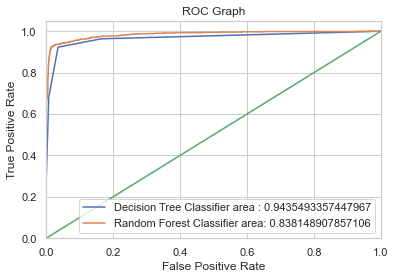

In [139]:
from sklearn.metrics import roc_curve
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()

# Plot Logistic Regression ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier area : {}'.format(dt_auc))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier area: {}'.format(rf_auc))


# Plot Base Rate ROC
plt.plot([0,1], [0,1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()